In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



In [2]:
df = pd.read_excel("transformeddata2.xlsx")

In [3]:
df = df.fillna(df.mean())


In [4]:
df1 = df.fillna(method='ffill')


In [5]:
ysplit = df1['Person Type']
xsplit = df1.drop(['Person Type'],axis=1)
dt = xsplit.select_dtypes(include=['datetime64'])
cat2 = list(dt.columns)
categorical = xsplit.select_dtypes(exclude=['float64'])
cat3 = list(categorical.columns)
cols = cat2 + cat3
le = preprocessing.LabelEncoder()
xsplit[cols] = xsplit[cols].apply(lambda col: le.fit_transform(col))


bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(xsplit,ysplit)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(xsplit.columns)
fes = pd.concat([dfcolumns,dfscores],axis=1)
fes.columns = ['Specs','Score']
fes.nlargest(15,'Score')
fes = fes.sort_values(by =['Score'],ascending=False)
large = fes.head(10)

corr = large['Specs'].values
xsplit = xsplit[corr]        


In [6]:
xtrain, xtest = train_test_split(xsplit, test_size=0.2, shuffle=False)
ytrain, ytest = train_test_split(ysplit, test_size=0.2, shuffle=False)

In [7]:
clf = KNeighborsClassifier(n_neighbors=2)

In [8]:
clf = clf.fit(xtrain,ytrain)

In [9]:
ypred = clf.predict(xtrain)

In [10]:
result = accuracy_score(ytrain,ypred)
print("The accuracy using K nearest neighbor is {}".format(result))

The accuracy using K nearest neighbor is 0.8596074509313664


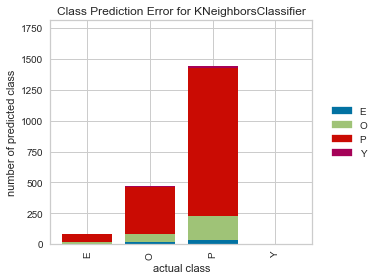

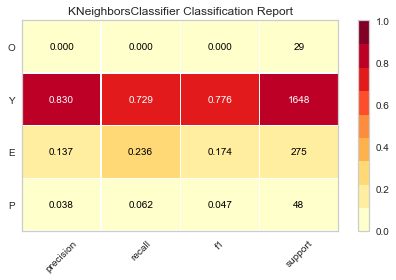

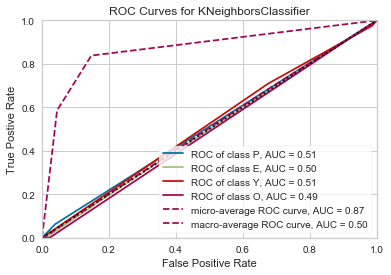

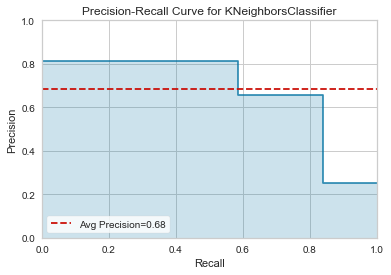

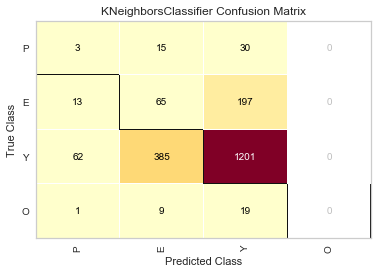

In [12]:
from yellowbrick.classifier import ClassPredictionError, ClassificationReport, ROCAUC, PrecisionRecallCurve, ConfusionMatrix
model = KNeighborsClassifier(n_neighbors=2)
viz = ClassPredictionError(model)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()

classes = ["P", "E", "Y", "O"]
viz = ClassificationReport(model, classes=classes, support=True)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()
 
classes = ["P", "E", "Y", "O"]
viz = ROCAUC(model, classes=classes)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()
 
viz = PrecisionRecallCurve(model)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()
 
classes = ["P", "E", "Y", "O"]
viz = ConfusionMatrix(model,classes=classes,label_encoder={0: 'P', 1: 'E', 2: 'Y', 3: 'O'})
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()